In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=58b2b224b362cf217791ec1cd30d1cc57dee8b81218a8db59e0563259e49991a
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_excel("/kaggle/input/ubmec-clean/ubmec_clean.xlsx")

In [4]:
df_train.head()

,text,classes
0,এই নাটকটি হচ্ছে এই সালের। কিন্তু তখন ইউটিউবে ছ...,joy
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ...,surprise
2,""" বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক "" "" কোথ...",joy
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সাল...",joy
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দ...,surprise


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3612


In [7]:
df_train['classes'].value_counts()

classes
joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: count, dtype: int64

In [8]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3612


In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [10]:
X_train  =  train_df['text'].values.tolist()
y_train = train_df['classes'].tolist()

In [11]:
X_test =  test_df['text'].values.tolist()
y_test = test_df['classes'].tolist()

In [12]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 45.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.9 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=98a14e616c15ba0bad515c7c33d0334ef0be14875ddb08ce6279fc77a903a763
  Stored in directory: /roo

In [13]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [14]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 19
	95percentile : 42
	99percentile : 77


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 19
	95percentile : 45
	99percentile : 79


In [15]:
print(trn)

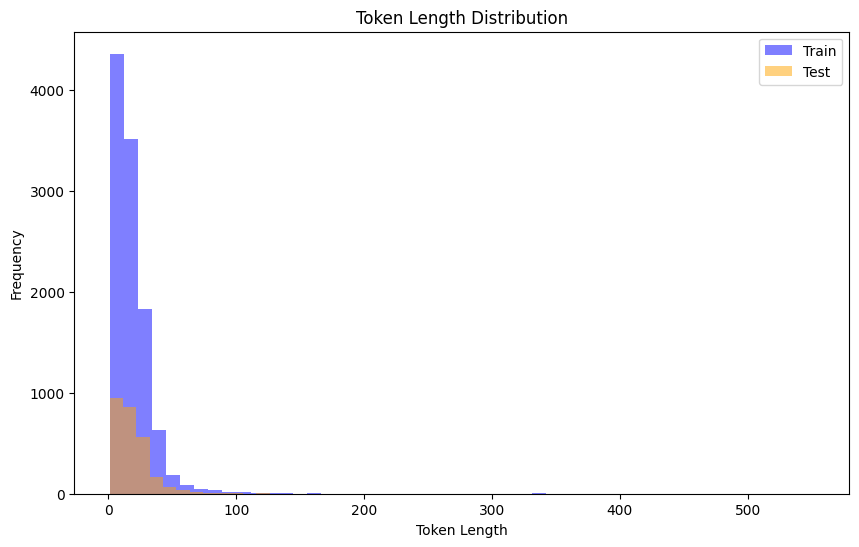

In [16]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [17]:
model = t.get_classifier()

In [18]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [19]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [20]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1344/1344 [==============================] - 856s 617ms/step - loss: 1.6206 - accuracy: 0.3309 - val_loss: 1.4047 - val_accuracy: 0.4531
Epoch 2/10
1344/1344 [==============================] - 825s 614ms/step - loss: 1.3326 - accuracy: 0.4906 - val_loss: 1.2960 - val_accuracy: 0.5067
Epoch 3/10
1344/1344 [==============================] - 825s 614ms/step - loss: 1.1749 - accuracy: 0.5580 - val_loss: 1.3402 - val_accuracy: 0.4985
Epoch 4/10
1344/1344 [==============================] - 825s 614ms/step - loss: 1.0238 - accuracy: 0.6218 - val_loss: 1.2403 - val_accuracy: 0.5298
Epoch 5/10
1344/1344 [==============================] - 825s 614ms/step - loss: 0.8989 - accuracy: 0.6709 - val_loss: 1.3270 - val_accuracy: 0.5182
Epoch 6/10
1344/1344 [==============================] - 825s 614ms/step - loss: 0.7302 - accuracy: 0.7340 - val_loss: 1.4690 - val_accuracy: 0.5104
Epoch 7/10
1344/1344 [===========================

In [21]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [22]:
classes=t.get_classes()

In [23]:
cm = learner.validate(class_names=t.get_classes())

84/84 [==============================] - 60s 677ms/step
              precision    recall  f1-score   support

       anger       0.53      0.51      0.52       496
     disgust       0.39      0.39      0.39       416
        fear       0.61      0.62      0.61       272
         joy       0.69      0.70      0.70       694
     sadness       0.46      0.46      0.46       537
    surprise       0.41      0.43      0.42       273

    accuracy                           0.53      2688
   macro avg       0.51      0.52      0.52      2688
weighted avg       0.53      0.53      0.53      2688



In [24]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [25]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [26]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [27]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [28]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")